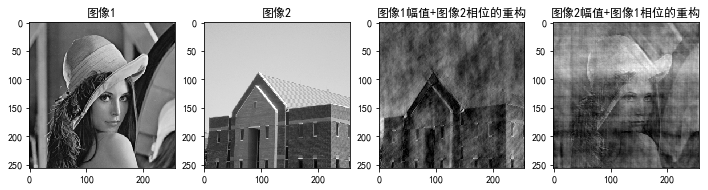

In [1]:
# 编写Python程序，交换两幅图像的幅值谱和相位谱，然后重构图像，查看重构图像的效果
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

I1=cv2.imread(r'..\img\lena.bmp',0);
m,n=I1.shape
I2=cv2.imread(r'..\img\room.tif',0);
I2=cv2.resize(I2,(n,m))  #将两幅图变为同样大小
fftI1=np.fft.fft2(I1)
fftI2=np.fft.fft2(I2)
a1=np.abs(fftI1)
a2=np.abs(fftI2)
b1=np.angle(fftI1);
b2=np.angle(fftI2);

RR1=a1*np.cos(b2)  #第一张图像的幅值与第二张图像的相位相结合，得到傅里叶变换的实部
II1=a1*np.sin(b2)  #第一张图像的幅值与第二张图像的相位相结合，得到傅里叶变换的虚部
fftI1=RR1+1j*II1
C1=np.fft.ifft2(fftI1); #重构新的图像

RR2=a2*np.cos(b1)
II2=a2*np.sin(b1)
fftI2=RR2+1j*II2
C2=np.fft.ifft2(fftI2);

plt.figure(figsize=(12,6))
plt.subplot(141)
plt.imshow(I1,cmap='gray'),plt.title('图像1')
plt.subplot(142)
plt.imshow(I2,cmap='gray'),plt.title('图像2')
plt.subplot(143)
plt.imshow(np.abs(C1),cmap='gray'),plt.title('图像1幅值+图像2相位的重构')
plt.subplot(144)
plt.imshow(np.abs(C2),cmap='gray'),plt.title('图像2幅值+图像1相位的重构')
plt.show()
